DEBUG:root:Initialized P-grid using projection +proj=stere +lon_0=-32 +lat_0=90 +lat_ts=80 +ellps=sphere
DEBUG:root:Lower left corner lon/lat of grid: (-62,47.3)
DEBUG:root:Grid spacing in projection coords: (5.5e+03,5.5e+03)
DEBUG:root:Number of grid Nodes in x/y      : ( 1050, 1250)
DEBUG:root:Min   x projection coordinate = -2.48e+06
DEBUG:root:Max   x projection coordinate = 3.3e+06
DEBUG:root:Min   y projection coordinate = -4.29e+06
DEBUG:root:Max   y projection coordinate = 2.59e+06
DEBUG:root:Min lon = -180
DEBUG:root:Max lon = 180
DEBUG:root:Min lat = 43.7
DEBUG:root:Max lat = 90


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(11, 11) (10, 10)


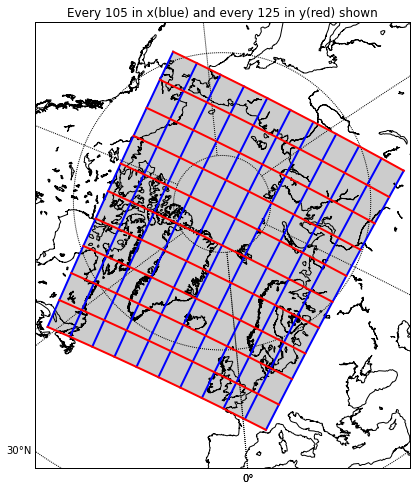

DEBUG:root:Endianness set to big


<type 'int'>
<type 'int'>
<type 'int'>
<type 'int'>
<type 'int'>
<type 'int'>


In [46]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  

import modeltools.grid
import matplotlib.pyplot
import modeltools.bathy
import modeltools.hycom.io
import numpy
grid1=modeltools.grid.Proj4Grid("+proj=stere +lon_0=-32 +lat_0=90 +lat_ts=80 +ellps=sphere",
                              -62,47.3,5500,5500,1050,1250)
figure=grid1.plotgrid(1.5)
matplotlib.pyplot.show()


modeltools.hycom.io.write_regional_grid(grid1)


DEBUG:root:Filtering width half-width = 3 grid cells


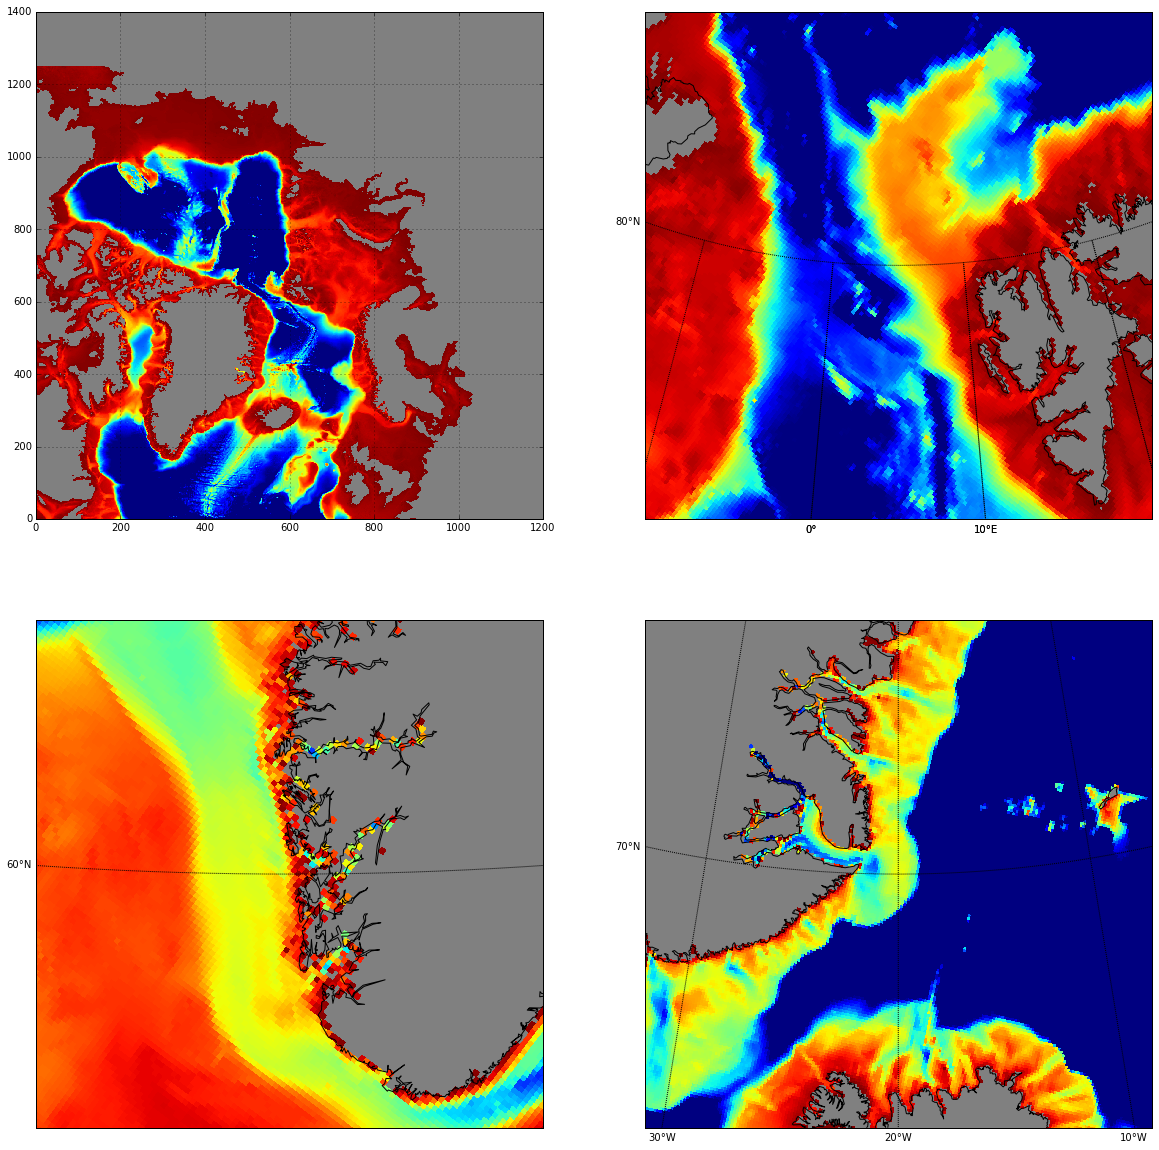

In [124]:
from mpl_toolkits.basemap import Basemap
gebco = modeltools.bathy.GEBCO2014("/Users/knutal/Bathymetry/GEBCO/GEBCO_2014_2D.nc")
lon,lat=grid1.pgrid()

w2=gebco.regrid(lon,lat,width=grid1.dx)
w2=numpy.ma.masked_where(w2>=0,w2)





def plot_map(ax,m,lon,lat,w2) :
    x,y=m(lon,lat)
    P=m.pcolormesh(x,y,w2,ax=ax)
    ax = P.get_axes()
    ax.set_axis_bgcolor('.5')
    m.drawcoastlines()
    m.drawmapboundary() # draw a line around the map region
    m.drawparallels(numpy.arange(-90.,120.,10.),labels=[1,0,0,0],ax=ax) # draw parallels
    m.drawmeridians(numpy.arange(0.,420.,10.),labels=[0,0,0,1],ax=ax) # draw meridians
    ax.grid()
    return P

def plot_excerpt(lon,lat,w2) :

    figure = matplotlib.pyplot.figure(figsize=(20,20))
    ax=figure.add_subplot(221)
    P=matplotlib.pyplot.pcolormesh(w2)
    P.set_clim(-3000,0)
    ax = P.get_axes()
    ax.set_axis_bgcolor('.5')
    ax.grid()

    ax=figure.add_subplot(222)
    m = Basemap(width=750000,height=750000,
                resolution='i',projection='stere',\
                lat_ts=80,lat_0=80,lon_0=5.)
    P=plot_map(ax,m,lon,lat,w2)
    P.set_clim(-3000,0)



    ax=figure.add_subplot(223)
    m = Basemap(width=500000,height=500000,
                resolution='i',projection='stere',\
                lat_ts=60,lat_0=60,lon_0=5.)
    P=plot_map(ax,m,lon,lat,w2)
    P.set_clim(-750,0)
    
    ax=figure.add_subplot(224)
    m = Basemap(width=1000000,height=1000000,
                resolution='i',projection='stere',\
                lat_ts=70,lat_0=70,lon_0=-20)
    P=plot_map(ax,m,lon,lat,w2)
    P.set_clim(-750,0)

    matplotlib.pyplot.show()
    
plot_excerpt(lon,lat,w2)


PAss 1
Found 2854 one neighbour cells
Found 673 one neighbour cells
Found 303 one neighbour cells
Found 160 one neighbour cells
Found 84 one neighbour cells
Found 49 one neighbour cells
Found 31 one neighbour cells
Found 14 one neighbour cells
Found 12 one neighbour cells
Found 5 one neighbour cells
Found 4 one neighbour cells
Found 4 one neighbour cells
Found 4 one neighbour cells
Found 1 one neighbour cells
Found 1 one neighbour cells
Found 1 one neighbour cells
Found 1 one neighbour cells
Found 1 one neighbour cells
Found 1 one neighbour cells
Found 1 one neighbour cells
Found 0 one neighbour cells
Main feature in terms of cells is feature 12
Position (  0.000, 60.000) : Feature 12 is used
Position ( 36.000, 75.000) : Feature 12 is used
Found 1130 islets
Found 161 islets
Found 46 islets
Found 19 islets
Found 7 islets
Found 5 islets
Found 4 islets
Found 3 islets
Found 1 islets
Found 1 islets
Found 1 islets
Found 1 islets
Found 0 islets
PAss 2
Found 0 one neighbour cells
Main feature 

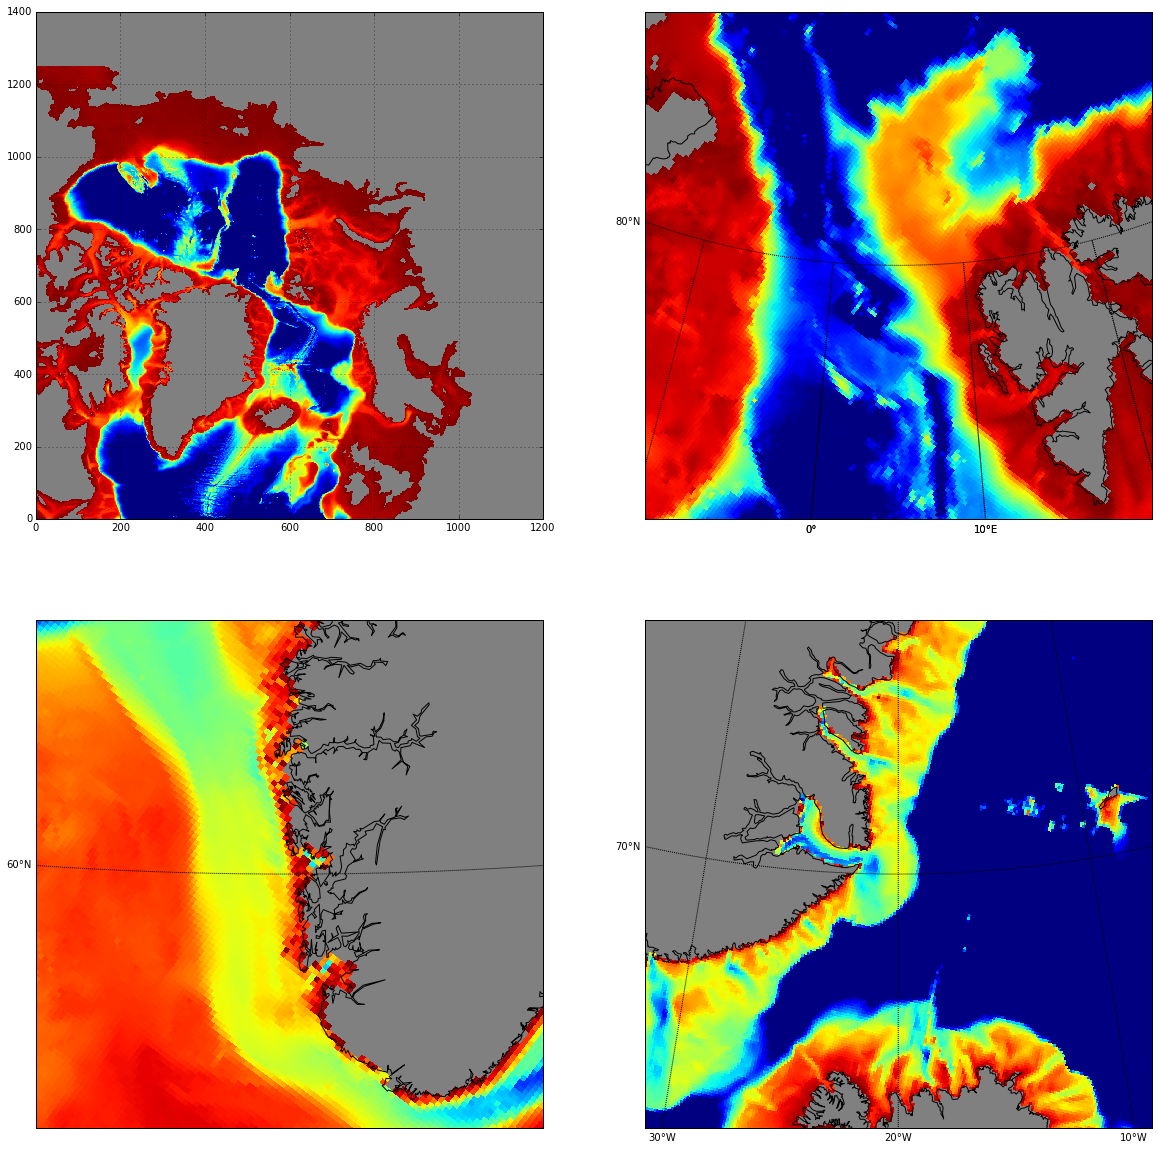

In [140]:
print "PAss 1"
w3=modeltools.bathy.remove_one_neighbour_cells(w2)
w3=modeltools.bathy.remove_isolated_basins(lon,lat,w3,[0,36],[60,75])
w3=modeltools.bathy.remove_islets(w3)

print "PAss 2"
w3=modeltools.bathy.remove_one_neighbour_cells(w3)
w3=modeltools.bathy.remove_isolated_basins(lon,lat,w3,[0,36],[60,75])
w3=modeltools.bathy.remove_islets(w3)

w3=numpy.ma.masked_where(w3>=0,w3)

plot_excerpt(lon,lat,w3)